<a href="https://colab.research.google.com/github/daolayaq10751/Aicoll/blob/main/Finanfut2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/daolayaq10751/Aicoll/refs/heads/main/df_concat.scv"
df_total = pd.read_csv(url)

#ghujckfnbklmfpl{gjmp{ermfgb}}

In [ ]:
df_total

,periodo,cedula,codigo_del_credito,dias_mora_al_final_de_mes_actual,dias_mora_al_final_de_mes_anterior,valor_mora_al_final_de_mes_actual,valor_mora_al_final_de_mes_anterior,probabilidad_impago_predecida_a_comienzo_de_mes,score_cobranza_predecido_a_comienzo_de_mes
0,3,24397112,2350000556,0,29,0,21157,36.00,453.0
1,3,24412332,2320000136,0,0,0,0,3.00,698.0
2,3,24412332,2220000045,0,0,0,0,5.00,698.0
3,3,24414243,2230000983,28,28,1616,1044,18.00,670.0
4,3,24433802,2110001255,0,0,0,0,6.00,252.0
...,...,...,...,...,...,...,...,...,...
37292,9,52066431,2510000387,58,28,2162,225,70.72,784.0
37293,9,24853699,2510000389,81,51,8526,4078,78.60,581.0
37294,9,1053830206,2510000388,0,0,0,0,74.32,715.0
37295,9,16210447,2521000058,27,0,4780,0,98.47,714.0


In [ ]:
df_total.columns

Index(['periodo', 'cedula', 'codigo_del_credito',
       'dias_mora_al_final_de_mes_actual',
       'dias_mora_al_final_de_mes_anterior',
       'valor_mora_al_final_de_mes_actual',
       'valor_mora_al_final_de_mes_anterior',
       'probabilidad_impago_predecida_a_comienzo_de_mes',
       'score_cobranza_predecido_a_comienzo_de_mes'],
      dtype='object')

In [ ]:
df_total.dtypes

,0
periodo,int64
cedula,int64
codigo_del_credito,int64
dias_mora_al_final_de_mes_actual,int64
dias_mora_al_final_de_mes_anterior,int64
valor_mora_al_final_de_mes_actual,int64
valor_mora_al_final_de_mes_anterior,int64
probabilidad_impago_predecida_a_comienzo_de_mes,float64
score_cobranza_predecido_a_comienzo_de_mes,float64


In [ ]:
df_total = df_total.astype({
    'periodo': 'string[python]',
    'cedula': 'string[python]',
    'codigo_del_credito': 'string[python]',
    'dias_mora_al_final_de_mes_actual': 'Int64',
    'dias_mora_al_final_de_mes_anterior': 'Int64',
    'valor_mora_al_final_de_mes_actual': 'Int64',
    'valor_mora_al_final_de_mes_anterior': 'Int64',
    'probabilidad_impago_predecida_a_comienzo_de_mes': 'float64',
    'score_cobranza_predecido_a_comienzo_de_mes': 'Int64'
})
df_total.dtypes

,0
periodo,string[python]
cedula,string[python]
codigo_del_credito,string[python]
dias_mora_al_final_de_mes_actual,Int64
dias_mora_al_final_de_mes_anterior,Int64
valor_mora_al_final_de_mes_actual,Int64
valor_mora_al_final_de_mes_anterior,Int64
probabilidad_impago_predecida_a_comienzo_de_mes,float64
score_cobranza_predecido_a_comienzo_de_mes,Int64


In [ ]:
var = [
    "dias_mora_al_final_de_mes_actual",
    "dias_mora_al_final_de_mes_anterior",
    "valor_mora_al_final_de_mes_actual",
    "valor_mora_al_final_de_mes_anterior",
    "probabilidad_impago_predecida_a_comienzo_de_mes",
    "score_cobranza_predecido_a_comienzo_de_mes"
]

# cuántos valores negativos hay en cada variable
negativos = df_total[var].lt(0).sum()
print(negativos)

dias_mora_al_final_de_mes_actual                     0
dias_mora_al_final_de_mes_anterior                   0
valor_mora_al_final_de_mes_actual                  105
valor_mora_al_final_de_mes_anterior                113
probabilidad_impago_predecida_a_comienzo_de_mes      0
score_cobranza_predecido_a_comienzo_de_mes           0
dtype: Int64


In [ ]:
df_total[var] = df_total[var].clip(lower=0)

In [ ]:
import pandas as pd

df_total['esta_en_mora'] = df_total['dias_mora_al_final_de_mes_actual'] > 0
meses = sorted(df_total['periodo'].unique())

resultados = pd.DataFrame(columns=[
    'periodo',
    'corr_prob_vs_dias_mora',
    'corr_prob_vs_valor_mora',
    'promedio_prob_sin_mora',
    'promedio_prob_con_mora'
])

for mes in meses:
    df_mes = df_total[df_total['periodo'] == mes]
    corr_dias = df_mes['probabilidad_impago_predecida_a_comienzo_de_mes'].corr(
        df_mes['dias_mora_al_final_de_mes_actual']
    )
    corr_valor = df_mes['probabilidad_impago_predecida_a_comienzo_de_mes'].corr(
        df_mes['valor_mora_al_final_de_mes_actual']
    )
    promedios = df_mes.groupby('esta_en_mora')['probabilidad_impago_predecida_a_comienzo_de_mes'].mean()
    promedio_sin_mora = promedios.get(False, float('nan'))
    promedio_con_mora = promedios.get(True, float('nan'))
    nuevo_df = pd.DataFrame([{
        'periodo': mes,
        'corr_prob_vs_dias_mora': corr_dias,
        'corr_prob_vs_valor_mora': corr_valor,
        'promedio_prob_sin_mora': promedio_sin_mora,
        'promedio_prob_con_mora': promedio_con_mora
    }])
    nuevo_df = nuevo_df[resultados.columns]
    resultados = pd.concat([resultados, nuevo_df], ignore_index=True)

print(resultados)

  periodo  corr_prob_vs_dias_mora  corr_prob_vs_valor_mora  \
0       3                0.395966                 0.128265   
1       4                0.390392                 0.117620   
2       5                0.317821                 0.092014   
3       6                0.315633                 0.087595   
4       7               -0.764922                -0.173998   
5       8               -0.760768                -0.175002   
6       9               -0.754768                -0.178057   

   promedio_prob_sin_mora  promedio_prob_con_mora  
0               15.106814               33.445195  
1               14.779421               32.867089  
2               26.737471               41.618540  
3               26.556854               40.016541  
4               89.763043               46.685118  
5               90.113257               51.446452  
6               90.409734               55.192421  


/tmp/ipython-input-1649841548.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, nuevo_df], ignore_index=True)


In [ ]:
# periodos correlación negativa
periodos_invertidos = resultados[resultados['corr_prob_vs_dias_mora'] < 0]['periodo']

# Inviertir
df_total.loc[df_total['periodo'].isin(periodos_invertidos),
             'probabilidad_impago_predecida_a_comienzo_de_mes'] = (
    100 - df_total['probabilidad_impago_predecida_a_comienzo_de_mes']
)


In [ ]:
import pandas as pd

df_total['esta_en_mora'] = df_total['dias_mora_al_final_de_mes_actual'] > 0
meses = sorted(df_total['periodo'].unique())

resultados = pd.DataFrame(columns=[
    'periodo',
    'corr_prob_vs_dias_mora',
    'corr_prob_vs_valor_mora',
    'promedio_prob_sin_mora',
    'promedio_prob_con_mora'
])

for mes in meses:
    df_mes = df_total[df_total['periodo'] == mes]
    corr_dias = df_mes['probabilidad_impago_predecida_a_comienzo_de_mes'].corr(
        df_mes['dias_mora_al_final_de_mes_actual']
    )
    corr_valor = df_mes['probabilidad_impago_predecida_a_comienzo_de_mes'].corr(
        df_mes['valor_mora_al_final_de_mes_actual']
    )
    promedios = df_mes.groupby('esta_en_mora')['probabilidad_impago_predecida_a_comienzo_de_mes'].mean()
    promedio_sin_mora = promedios.get(False, float('nan'))
    promedio_con_mora = promedios.get(True, float('nan'))
    nuevo_df = pd.DataFrame([{
        'periodo': mes,
        'corr_prob_vs_dias_mora': corr_dias,
        'corr_prob_vs_valor_mora': corr_valor,
        'promedio_prob_sin_mora': promedio_sin_mora,
        'promedio_prob_con_mora': promedio_con_mora
    }])
    nuevo_df = nuevo_df[resultados.columns]
    resultados = pd.concat([resultados, nuevo_df], ignore_index=True)

print(resultados)


  periodo  corr_prob_vs_dias_mora  corr_prob_vs_valor_mora  \
0       3                0.395966                 0.128265   
1       4                0.390392                 0.117620   
2       5                0.317821                 0.092014   
3       6                0.315633                 0.087595   
4       7                0.764922                 0.173998   
5       8                0.760768                 0.175002   
6       9                0.754768                 0.178057   

   promedio_prob_sin_mora  promedio_prob_con_mora  
0               15.106814               33.445195  
1               14.779421               32.867089  
2               26.737471               41.618540  
3               26.556854               40.016541  
4               10.236957               53.314882  
5                9.886743               48.553548  
6                9.590266               44.807579  


/tmp/ipython-input-1836306603.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, nuevo_df], ignore_index=True)


In [ ]:
df_total.describe()

,dias_mora_al_final_de_mes_actual,dias_mora_al_final_de_mes_anterior,valor_mora_al_final_de_mes_actual,valor_mora_al_final_de_mes_anterior,probabilidad_impago_predecida_a_comienzo_de_mes,score_cobranza_predecido_a_comienzo_de_mes
count,37297.0,37297.0,37297.0,37297.0,37297.000000,37285.0
mean,23.821862,20.373167,35686.32335,30393.17677,22.248510,699.051978
std,69.034165,61.824788,508695.837281,459278.814481,23.089676,202.84252
min,0.0,0.0,0.0,0.0,0.000000,0.0
25%,0.0,0.0,0.0,0.0,4.190000,600.0
50%,0.0,0.0,0.0,0.0,12.570000,746.0
75%,0.0,0.0,0.0,0.0,35.000000,852.0
max,864.0,834.0,34261704.0,31753550.0,99.990000,1000.0


In [ ]:
df_total['score_cobranza_predecido_a_comienzo_de_mes'].describe()

,score_cobranza_predecido_a_comienzo_de_mes
count,37285.0
mean,699.051978
std,202.84252
min,0.0
25%,600.0
50%,746.0
75%,852.0
max,1000.0


In [ ]:
df_total['probabilidad_impago_predecida_a_comienzo_de_mes'].describe()


,probabilidad_impago_predecida_a_comienzo_de_mes
count,37297.000000
mean,22.248510
std,23.089676
min,0.000000
25%,4.190000
50%,12.570000
75%,35.000000
max,99.990000


In [ ]:
mask_start = (df_total['periodo'] == '3') & (df_total['dias_mora_al_final_de_mes_actual'] == 0)
df_total.loc[mask_start, 'probabilidad_impago_predecida_a_comienzo_de_mes'].describe()


,probabilidad_impago_predecida_a_comienzo_de_mes
count,4990.000000
mean,15.106814
std,17.305342
min,0.000000
25%,3.000000
50%,8.000000
75%,22.000000
max,98.000000


In [ ]:
# Análisis tasas de acierto por crédito (codigo_del_credito como llave)
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, brier_score_loss, confusion_matrix, accuracy_score, precision_score, recall_score

# ---------------------------
# PRE: df_total ya cargado en memoria
# ---------------------------
df = df_total.copy()  # asume df_total existe

# --- 1) Tipos y limpieza básica ---
# Periodo: convertir a entero (viene como string con valores '3'..'9')
df['periodo'] = pd.to_numeric(df['periodo'], errors='coerce').astype('Int64')

# Forzar tipos en columnas numéricas relevantes
int_cols = [
    'dias_mora_al_final_de_mes_actual', 'dias_mora_al_final_de_mes_anterior',
    'valor_mora_al_final_de_mes_actual', 'valor_mora_al_final_de_mes_anterior',
    'score_cobranza_predecido_a_comienzo_de_mes'
]
for c in int_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

# Probabilidad: viene en porcentaje (ej. 98.80 significa 98.8%)
pcol = 'probabilidad_impago_predecida_a_comienzo_de_mes'
if pcol not in df.columns:
    raise KeyError(f"No se encontró la columna '{pcol}' en df_total")
df[pcol] = pd.to_numeric(df[pcol], errors='coerce')           # valores 0..100
df['p_impago_0_1'] = df[pcol] / 100.0                          # versión 0..1

# Usaremos codigo_del_credito como llave única por crédito
key = 'codigo_del_credito'
if key not in df.columns:
    raise KeyError(f"No se encontró la columna '{key}' en df_total")
df[key] = df[key].astype(str)

# --- 2) Construir muestra inicial: periodo 3 y dias_mora == 0 ---
mask_start = (df['periodo'] == 3) & (df['dias_mora_al_final_de_mes_actual'] == 0)
start_df = df.loc[mask_start, [key, 'cedula', 'p_impago_0_1', pcol, 'score_cobranza_predecido_a_comienzo_de_mes']].copy()
start_df = start_df.rename(columns={
    key: 'loan_code',
    'p_impago_0_1': 'p3',          # 0..1
    pcol: 'p3_percent',            # 0..100
    'score_cobranza_predecido_a_comienzo_de_mes': 'score3'
})
# mantener p3 también en escala 0..100 para umbrales definidos por percentiles
start_df['p3_percent'] = pd.to_numeric(start_df['p3_percent'], errors='coerce')
start_df['p3'] = (start_df['p3_percent'] / 100.0).astype(float)  # versión 0..1
start_df['p3_100'] = start_df['p3_percent'].astype(float)        # versión 0..100 (útil para umbrales)

# Lista de créditos a seguir
loans_to_follow = start_df['loan_code'].unique().tolist()

# --- 3) Extraer registros futuros 4..9 para esos créditos ---
future_periods = [4,5,6,7,8,9]
fut = df[df[key].isin(loans_to_follow) & df['periodo'].isin(future_periods)].copy()

# Pivot de dias de mora por periodo (cada crédito x columna mes)
pivot_days = fut.pivot_table(index=key, columns='periodo', values='dias_mora_al_final_de_mes_actual', aggfunc='first')
# Pivot de probabilidad por periodo (opcional, 0..1)
pivot_p = fut.pivot_table(index=key, columns='periodo', values='p_impago_0_1', aggfunc='first')

# Unir con start_df (index por loan_code)
summary = start_df.set_index('loan_code').join(pivot_days)
summary = summary.join(pivot_p, rsuffix='_p_future')

# missing_future = no hay ningún registro en 4..9 (todas NaN)
summary['missing_future'] = summary[future_periods].isna().all(axis=1)

# ever_default: si en ALGÚN mes 4..9 dias_mora > 0 -> True (evento)
summary['ever_default'] = (summary[future_periods] > 0).any(axis=1)
summary['ever_default_int'] = summary['ever_default'].fillna(False).astype(int)

# primer mes con mora (>0), NaN si nunca
def first_mora_month(row):
    for m in future_periods:
        v = row.get(m)
        if pd.notna(v) and int(v) > 0:
            return int(m)
    return np.nan
summary['first_mora_month'] = summary.apply(first_mora_month, axis=1)

# --- 4) Resumen cuantitativo básico ---
total_initial = len(summary)
missing_future = int(summary['missing_future'].sum())
evaluated = total_initial - missing_future

stable_excl_missing = int(((summary['ever_default_int'] == 0) & (~summary['missing_future'])).sum())
changed_excl_missing = int(((summary['ever_default_int'] == 1) & (~summary['missing_future'])).sum())

print("== RESUMEN MUESTRA INICIAL (periodo 3, dias_mora=0 por crédito) ==")
print(f"Total créditos en muestra inicial: {total_initial}")
print(f"Créditos sin datos futuros (4-9): {missing_future}")
print(f"Créditos con datos futuros (evaluados): {evaluated}")
print(f"De los evaluados -> Estables (nunca tuvieron mora 4-9): {stable_excl_missing}")
print(f"De los evaluados -> Cambiaron a mora >0 en algún mes 4-9: {changed_excl_missing}")

# --- 5) Evaluación de la probabilidad asignada en marzo (p3) ---
eval_df = summary[~summary['missing_future']].copy()  # solo evaluados
# y_true: etiqueta de evento (0/1)
y_true = eval_df['ever_default_int'].values
# y_prob: score usado para orden y AUC (puede ser 0..1 o 0..100): aquí usamos 0..100 para interpretabilidad
y_prob_100 = eval_df['p3_100'].values    # 0..100
y_prob_01 = eval_df['p3'].values        # 0..1 (para Brier)

# Métricas continuas
auc = roc_auc_score(y_true, y_prob_100) if len(np.unique(y_true)) > 1 else float('nan')
brier = brier_score_loss(y_true, y_prob_01)  # requiere 0..1

print("\n== Métricas continuas ==")
print(f"AUC-ROC (ever_default 4-9): {auc:.4f}")
print(f"Brier score: {brier:.6f}")

# === 6) Umbrales empíricos según percentiles de la muestra (marzo, mora=0) ===
# Usamos los percentiles que nos diste: p25=3, p50=8, p75=22
# Añadimos un umbral superior intermedio (50) para capturar extremos
thresholds = [3, 8, 22, 50]   # escala 0..100

# Etiquetas de riesgo (usando las referencias)
def categorize_risk_100(p100):
    if pd.isna(p100): return 'SinProb'
    if p100 < 3: return 'Bajo'
    elif p100 < 8: return 'Medio-bajo'
    elif p100 < 22: return 'Medio'
    elif p100 < 50: return 'Alto'
    else: return 'Muy alto'

eval_df['nivel_riesgo_p3'] = eval_df['p3_100'].apply(categorize_risk_100)

# Métricas por umbral: construimos tabla con confusion y métricas
th_results = []
for t in thresholds:
    y_pred = (y_prob_100 >= t).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    # confusion_matrix con labels=[0,1] garantiza matriz 2x2 aunque falte alguna clase
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    th_results.append({
        'threshold': t,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'tn': int(tn), 'fp': int(fp), 'fn': int(fn), 'tp': int(tp)
    })
th_df = pd.DataFrame(th_results)

print("\n== Resultados por umbral (basados en percentiles empíricos) ==")
print(th_df.to_string(index=False))

# --- 7) Evolución mes a mes: primer mes donde aparece mora ---
first_counts = eval_df['first_mora_month'].value_counts(dropna=True).reindex(future_periods, fill_value=0)
cum_counts = first_counts.cumsum()

print("\n== Conteo de primeros meses con mora (solo evaluados) ==")
print(first_counts.to_string())
print("\n== Conteo acumulado de créditos que ya presentaron mora hasta cada mes ==")
print(cum_counts.to_string())

# --- 8) Curva de calibración simple por deciles de p3 (observed rate vs predicted mean) ---
# Deciles sobre p3_100 (evita sesgo por repetidos usando rank)
eval_df = eval_df.copy()
eval_df['p3_rank'] = eval_df['p3_100'].rank(method='first')
eval_df['p3_decile'] = pd.qcut(eval_df['p3_rank'], 10, labels=False, duplicates='drop')
calib = eval_df.groupby('p3_decile').agg(
    n=('p3_100', 'size'),
    mean_pred=('p3_100', 'mean'),
    obs_rate=('ever_default_int', 'mean')
).reset_index().sort_values('p3_decile')
print("\n== Calibración por deciles (p3 0..100) ==")
print(calib.to_string(index=False))

# --- 9) Detectar casos para inspección (FP & FN) ---
res_export = summary.reset_index().rename(columns={'index':'loan_code'})
# Asegurar columnas de meses 4..9 existen en res_export
for m in future_periods:
    if m not in res_export.columns:
        res_export[m] = np.nan

# Falsos positivos: p3 alto (>=50 por ejemplo) pero ever_default == 0
fp_cases = res_export[(res_export['ever_default_int']==0) & (res_export['p3_percent']>=50)].sort_values('p3_percent', ascending=False)
# Falsos negativos: p3 bajo (<8 por ejemplo) pero ever_default == 1
fn_cases = res_export[(res_export['ever_default_int']==1) & (res_export['p3_percent']<8)].sort_values('p3_percent', ascending=True)

print(f"\nTop 10 falsos positivos (p3_percent >= 50, pero estables): {len(fp_cases)} encontrados")
if len(fp_cases)>0:
    print(fp_cases[['loan_code','cedula','p3_percent','ever_default_int']].head(10).to_string(index=False))

print(f"\nTop 10 falsos negativos (p3_percent < 8, pero terminaron con mora): {len(fn_cases)} encontrados")
if len(fn_cases)>0:
    print(fn_cases[['loan_code','cedula','p3_percent','ever_default_int','first_mora_month']].head(10).to_string(index=False))

# --- 10) Export para reportar a Javier ---
out_cols = ['loan_code','cedula','p3','p3_100','p3_percent','score3','missing_future','ever_default_int','first_mora_month'] + future_periods
export_df = res_export[out_cols].copy()
export_filename = "analisis_tasa_acierto_por_credito_periodo3.csv"
export_df.to_csv(export_filename, index=False)
print(f"\nCSV con detalle guardado: {export_filename}")

# --- FIN ---


KeyError: "None of [Index([4, 5, 6, 7, 8, 9], dtype='int64')] are in the [columns]"

tipo_acierto periodo  tasa_acierto_alto  tasa_acierto_bajo  tasa_error_I  \
0                  3           0.091427           0.643300      0.062947   
1                  4           0.088040           0.660628      0.066874   
2                  5           0.089087           0.654389      0.073956   
3                  6           0.109619           0.565926      0.079262   
4                  7           0.088610           0.583013      0.063509   
5                  8           0.092526           0.568272      0.078329   
6                  9           0.119615           0.547648      0.068734   

tipo_acierto  tasa_error_II  
0                  0.202284  
1                  0.184414  
2                  0.182520  
3                  0.245138  
4                  0.264812  
5                  0.260810  
6                  0.263933  


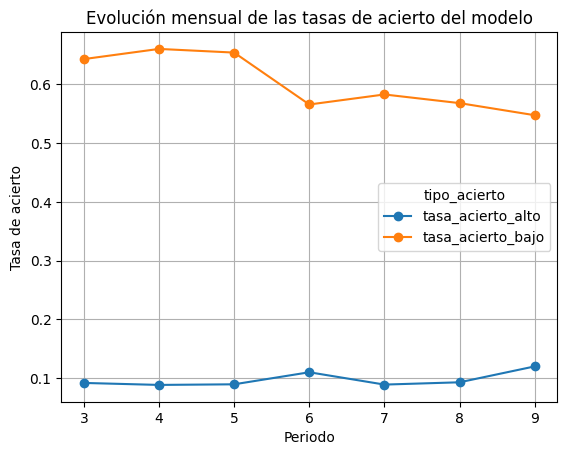

In [ ]:
import pandas as pd

# =========================
# 1️⃣ Clasificar el score en niveles de riesgo
# =========================

def clasificar_score(x):
    if x < 500:
        return 'Muy alto riesgo'
    elif x < 650:
        return 'Alto riesgo'
    elif x < 800:
        return 'Riesgo medio'
    else:
        return 'Bajo riesgo'

df_total['nivel_riesgo'] = df_total['score_cobranza_predecido_a_comienzo_de_mes'].apply(clasificar_score)

# =========================
# 2️⃣ Determinar el comportamiento real (mejoró o empeoró)
# =========================

df_total['cambio_mora'] = (
    df_total['dias_mora_al_final_de_mes_actual'] - df_total['dias_mora_al_final_de_mes_anterior']
)

df_total['comportamiento_real'] = df_total['cambio_mora'].apply(
    lambda x: 'empeoro' if x > 0 else 'mejoro_o_mantiene'
)

# =========================
# 3️⃣ Calcular si el modelo acertó o no
# =========================

def evaluar_acierto(row):
    # Acierto si predijo riesgo alto y efectivamente empeora
    if row['nivel_riesgo'] in ['Muy alto riesgo', 'Alto riesgo'] and row['comportamiento_real'] == 'empeoro':
        return 'acierto_riesgo_alto'
    # Acierto si predijo riesgo bajo y efectivamente mejora o mantiene
    elif row['nivel_riesgo'] in ['Riesgo medio', 'Bajo riesgo'] and row['comportamiento_real'] == 'mejoro_o_mantiene':
        return 'acierto_riesgo_bajo'
    # Error tipo I: predijo bajo riesgo, pero empeoró
    elif row['nivel_riesgo'] in ['Riesgo medio', 'Bajo riesgo'] and row['comportamiento_real'] == 'empeoro':
        return 'error_tipo_I'
    # Error tipo II: predijo alto riesgo, pero mejoró o mantuvo
    else:
        return 'error_tipo_II'

df_total['tipo_acierto'] = df_total.apply(evaluar_acierto, axis=1)

# =========================
# 4️⃣ Calcular tasas de acierto por periodo (mes)
# =========================

# Contar registros por tipo y por mes
tabla_resumen = (
    df_total
    .groupby(['periodo', 'tipo_acierto'])
    .size()
    .unstack(fill_value=0)
)

# Calcular tasas porcentuales
tabla_resumen['tasa_acierto_alto'] = tabla_resumen['acierto_riesgo_alto'] / tabla_resumen.sum(axis=1)
tabla_resumen['tasa_acierto_bajo'] = tabla_resumen['acierto_riesgo_bajo'] / tabla_resumen.sum(axis=1)
tabla_resumen['tasa_error_I'] = tabla_resumen['error_tipo_I'] / tabla_resumen.sum(axis=1)
tabla_resumen['tasa_error_II'] = tabla_resumen['error_tipo_II'] / tabla_resumen.sum(axis=1)

# Dejar solo las tasas
resultados_tasas = tabla_resumen[
    ['tasa_acierto_alto', 'tasa_acierto_bajo', 'tasa_error_I', 'tasa_error_II']
].reset_index()

print(resultados_tasas)

# =========================
# 5️⃣ (Opcional) Graficar la evolución de aciertos
# =========================
import matplotlib.pyplot as plt

resultados_tasas.plot(x='periodo', y=['tasa_acierto_alto', 'tasa_acierto_bajo'], marker='o')
plt.title('Evolución mensual de las tasas de acierto del modelo')
plt.xlabel('Periodo')
plt.ylabel('Tasa de acierto')
plt.grid(True)
plt.show()


Percentiles del score:
p25 = 600.00, p50 = 746.00, p75 = 852.00

Tasas de acierto y error por periodo:
tipo_acierto periodo  tasa_acierto_alto  tasa_acierto_bajo  tasa_error_I  \
0                  3           0.115628           0.486388      0.038750   
1                  4           0.109026           0.517308      0.045892   
2                  5           0.111678           0.510647      0.051370   
3                  6           0.134081           0.410510      0.054804   
4                  7           0.109586           0.422065      0.042536   
5                  8           0.117510           0.411169      0.053350   
6                  9           0.142530           0.384268      0.045824   

tipo_acierto  tasa_error_II  
0                  0.359185  
1                  0.327722  
2                  0.326249  
3                  0.400544  
4                  0.425751  
5                  0.417903  
6                  0.427304  


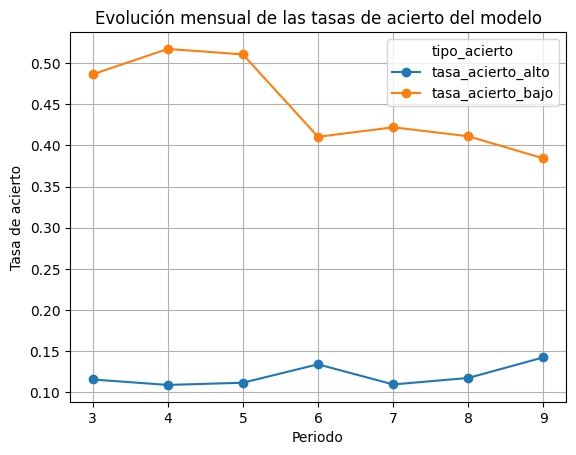

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1️⃣ Calcular percentiles del score
# =========================

p25 = df_total['score_cobranza_predecido_a_comienzo_de_mes'].quantile(0.25)
p50 = df_total['score_cobranza_predecido_a_comienzo_de_mes'].quantile(0.50)
p75 = df_total['score_cobranza_predecido_a_comienzo_de_mes'].quantile(0.75)

print("Percentiles del score:")
print(f"p25 = {p25:.2f}, p50 = {p50:.2f}, p75 = {p75:.2f}")

# =========================
# 2️⃣ Clasificar el score en niveles de riesgo (usando percentiles)
# =========================

def clasificar_score(x):
    if x < p25:
        return 'Muy alto riesgo'
    elif x < p50:
        return 'Alto riesgo'
    elif x < p75:
        return 'Riesgo medio'
    else:
        return 'Bajo riesgo'

df_total['nivel_riesgo'] = df_total['score_cobranza_predecido_a_comienzo_de_mes'].apply(clasificar_score)

# =========================
# 3️⃣ Determinar el comportamiento real (mejoró o empeoró)
# =========================

df_total['cambio_mora'] = (
    df_total['dias_mora_al_final_de_mes_actual'] - df_total['dias_mora_al_final_de_mes_anterior']
)

df_total['comportamiento_real'] = df_total['cambio_mora'].apply(
    lambda x: 'empeoro' if x > 0 else 'mejoro_o_mantiene'
)

# =========================
# 4️⃣ Calcular si el modelo acertó o no
# =========================

def evaluar_acierto(row):
    if row['nivel_riesgo'] in ['Muy alto riesgo', 'Alto riesgo'] and row['comportamiento_real'] == 'empeoro':
        return 'acierto_riesgo_alto'
    elif row['nivel_riesgo'] in ['Riesgo medio', 'Bajo riesgo'] and row['comportamiento_real'] == 'mejoro_o_mantiene':
        return 'acierto_riesgo_bajo'
    elif row['nivel_riesgo'] in ['Riesgo medio', 'Bajo riesgo'] and row['comportamiento_real'] == 'empeoro':
        return 'error_tipo_I'
    else:
        return 'error_tipo_II'

df_total['tipo_acierto'] = df_total.apply(evaluar_acierto, axis=1)

# =========================
# 5️⃣ Calcular tasas de acierto por periodo (mes)
# =========================

tabla_resumen = (
    df_total
    .groupby(['periodo', 'tipo_acierto'])
    .size()
    .unstack(fill_value=0)
)

# Calcular tasas porcentuales
tabla_resumen['tasa_acierto_alto'] = tabla_resumen['acierto_riesgo_alto'] / tabla_resumen.sum(axis=1)
tabla_resumen['tasa_acierto_bajo'] = tabla_resumen['acierto_riesgo_bajo'] / tabla_resumen.sum(axis=1)
tabla_resumen['tasa_error_I'] = tabla_resumen['error_tipo_I'] / tabla_resumen.sum(axis=1)
tabla_resumen['tasa_error_II'] = tabla_resumen['error_tipo_II'] / tabla_resumen.sum(axis=1)

# Dejar solo las tasas
resultados_tasas = tabla_resumen[
    ['tasa_acierto_alto', 'tasa_acierto_bajo', 'tasa_error_I', 'tasa_error_II']
].reset_index()

print("\nTasas de acierto y error por periodo:")
print(resultados_tasas)

# =========================
# 6️⃣ (Opcional) Graficar la evolución de aciertos
# =========================

resultados_tasas.plot(x='periodo', y=['tasa_acierto_alto', 'tasa_acierto_bajo'], marker='o')
plt.title('Evolución mensual de las tasas de acierto del modelo')
plt.xlabel('Periodo')
plt.ylabel('Tasa de acierto')
plt.grid(True)
plt.show()


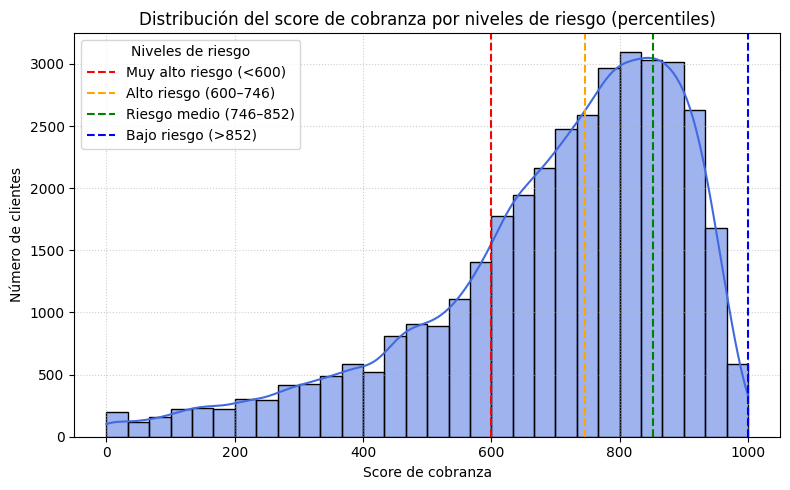

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Gráfica ajustada según percentiles del score
# =========================

plt.figure(figsize=(8,5))
sns.histplot(df_total['score_cobranza_predecido_a_comienzo_de_mes'], bins=30, kde=True, color='royalblue')

# Título y etiquetas
plt.title('Distribución del score de cobranza por niveles de riesgo (percentiles)', fontsize=12)
plt.xlabel('Score de cobranza')
plt.ylabel('Número de clientes')

# Líneas de percentiles (según los valores calculados en tu código)
plt.axvline(p25, color='red', linestyle='--', linewidth=1.5, label=f'Muy alto riesgo (<{p25:.0f})')
plt.axvline(p50, color='orange', linestyle='--', linewidth=1.5, label=f'Alto riesgo ({p25:.0f}–{p50:.0f})')
plt.axvline(p75, color='green', linestyle='--', linewidth=1.5, label=f'Riesgo medio ({p50:.0f}–{p75:.0f})')
plt.axvline(df_total['score_cobranza_predecido_a_comienzo_de_mes'].max(), color='blue', linestyle='--', linewidth=1.5, label=f'Bajo riesgo (>{p75:.0f})')

plt.legend(title='Niveles de riesgo', loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


Resumen por deciles de score (usando días de mora):
   decil_score  promedio_score  clientes  dias_mora_total  \
0          0.0       251.09866       834           410213   
1          1.0       487.23369       961           145327   
2          2.0      598.693713      1027            79052   
3          3.0        666.5878      1135            66472   
4          4.0       722.12698      1105            43514   
5          5.0        769.7019      1107            36347   
6          6.0       811.20109      1089            30021   
7          7.0      851.680225      1102            33852   
8          8.0      893.176766      1068            24637   
9          9.0      943.451066       876            19032   

   dias_mora_acum_final  
0                0.4617  
1              0.625267  
2              0.714241  
3              0.789056  
4              0.838032  
5              0.878941  
6               0.91273  
7              0.950831  
8               0.97856  
9              0

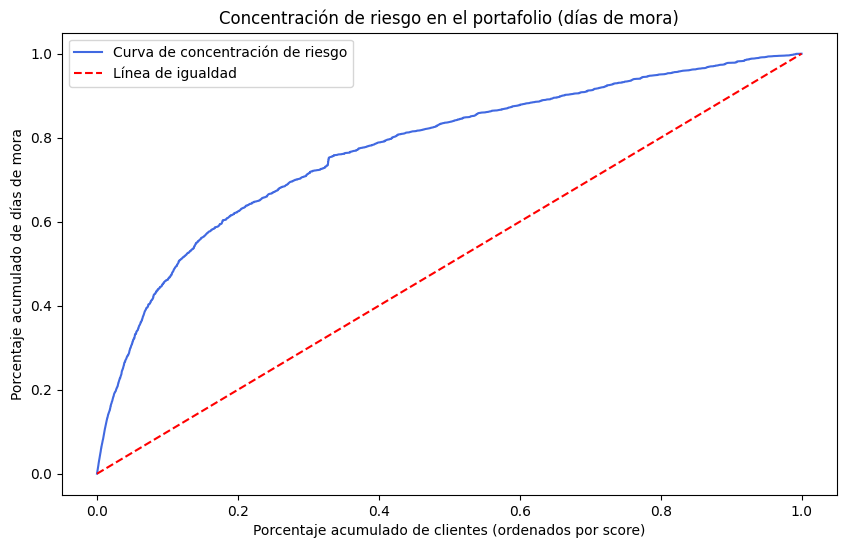

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Ordenar clientes por score de cobranza (más riesgo primero) ---
df_riesgo = df_total.sort_values('score_cobranza_predecido_a_comienzo_de_mes').copy()

# --- 2. Calcular mora acumulada y porcentaje acumulado de días de mora ---
df_riesgo['mora_acumulada'] = df_riesgo['dias_mora_al_final_de_mes_actual'].cumsum()
mora_total = df_riesgo['dias_mora_al_final_de_mes_actual'].sum()
df_riesgo['porc_mora_acumulada'] = df_riesgo['mora_acumulada'] / mora_total
df_riesgo['porc_clientes'] = (df_riesgo.reset_index().index + 1) / len(df_riesgo)

# --- 3. Crear resumen por deciles de score ---
df_riesgo['decil_score'] = pd.qcut(df_riesgo['score_cobranza_predecido_a_comienzo_de_mes'], 10, labels=False)
df_resumen = df_riesgo.groupby('decil_score').agg(
    promedio_score=('score_cobranza_predecido_a_comienzo_de_mes', 'mean'),
    clientes=('cedula', 'nunique'),
    dias_mora_total=('dias_mora_al_final_de_mes_actual', 'sum'),
    dias_mora_acum_final=('porc_mora_acumulada', 'max')
).reset_index()

print("Resumen por deciles de score (usando días de mora):")
print(df_resumen)

# --- 4. Graficar curva de concentración de riesgo usando días de mora ---
plt.figure(figsize=(10,6))
sns.lineplot(x='porc_clientes', y='porc_mora_acumulada', data=df_riesgo, color='royalblue', label='Curva de concentración de riesgo')
plt.plot([0,1],[0,1], color='red', linestyle='--', label='Línea de igualdad')  # riesgo distribuido uniformemente
plt.title('Concentración de riesgo en el portafolio (días de mora)')
plt.xlabel('Porcentaje acumulado de clientes (ordenados por score)')
plt.ylabel('Porcentaje acumulado de días de mora')
plt.legend()
plt.show()


Comparación de mora predicha vs real por periodo:
  periodo  probabilidad_promedio_impago  proporcion_real_en_mora  \
0       3                     18.970579                21.069282   
1       4                     18.680259                21.566286   
2       5                     30.042266                22.208052   
3       6                     29.849365                24.462019   
4       7                     80.127302                22.368163   
5       8                     80.952098                23.692568   
6       9                     81.242257                26.031164   

   ratio_pred_vs_real  
0             0.90039  
1            0.866179  
2            1.352765  
3            1.220233  
4            3.582203  
5            3.416772  
6            3.120961  


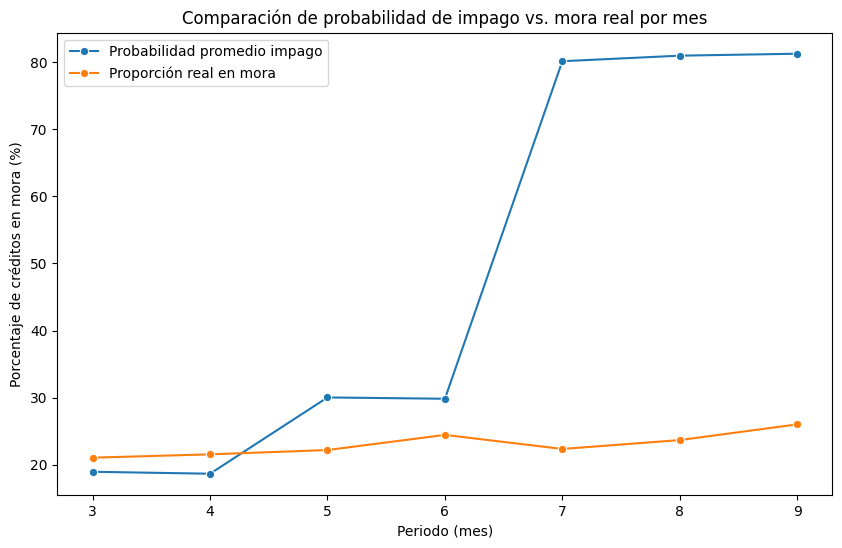

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Crear columna booleana de créditos en mora
df_total['en_mora'] = df_total['dias_mora_al_final_de_mes_actual'] > 0

# 2️⃣ Proporción real de créditos en mora por periodo
mora_real_proporcion = (
    df_total.groupby('periodo')['en_mora']
    .mean()
    .reset_index()
    .rename(columns={'en_mora':'proporcion_real_en_mora'})
)
# Convertimos a porcentaje
mora_real_proporcion['proporcion_real_en_mora'] *= 100

# 3️⃣ Probabilidad promedio de impago por periodo
riesgo_esperado_promedio = (
    df_total.groupby('periodo')['probabilidad_impago_predecida_a_comienzo_de_mes']
    .mean()
    .reset_index()
    .rename(columns={'probabilidad_impago_predecida_a_comienzo_de_mes':'probabilidad_promedio_impago'})
)

# 4️⃣ Combinar resultados
comparacion_mora = pd.merge(riesgo_esperado_promedio, mora_real_proporcion, on='periodo')

# 5️⃣ Calcular ratio predicción vs realidad
comparacion_mora['ratio_pred_vs_real'] = comparacion_mora['probabilidad_promedio_impago'] / comparacion_mora['proporcion_real_en_mora']

# 6️⃣ Mostrar tabla de resultados
print("Comparación de mora predicha vs real por periodo:")
print(comparacion_mora)

# 7️⃣ Gráfico comparativo
plt.figure(figsize=(10,6))
sns.lineplot(data=comparacion_mora, x='periodo', y='probabilidad_promedio_impago', marker='o', label='Probabilidad promedio impago')
sns.lineplot(data=comparacion_mora, x='periodo', y='proporcion_real_en_mora', marker='o', label='Proporción real en mora')
plt.title("Comparación de probabilidad de impago vs. mora real por mes")
plt.ylabel("Porcentaje de créditos en mora (%)")
plt.xlabel("Periodo (mes)")
plt.xticks(comparacion_mora['periodo'])  # Asegura que los meses aparezcan como 3,4,5...
plt.legend()
plt.show()


  periodo  correlacion
0       3    -0.427899
1       4    -0.449232
2       5    -0.446630
3       6    -0.405635
4       7    -0.383385
5       8    -0.378435
6       9    -0.550896


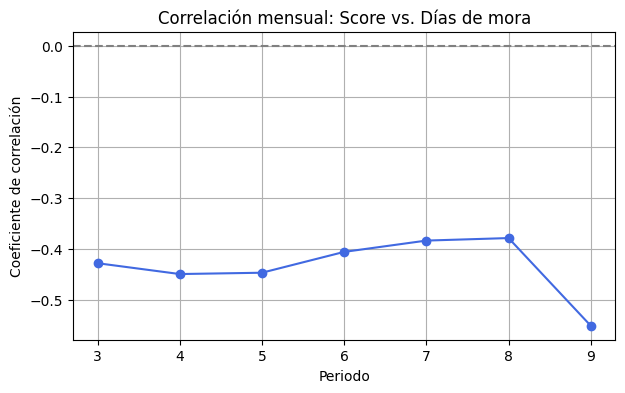

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular correlación por mes
corr_mensual = (
    df_total.groupby('periodo')[['score_cobranza_predecido_a_comienzo_de_mes',
                                 'dias_mora_al_final_de_mes_actual']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
)

corr_mensual.columns = ['periodo', 'variable', 'correlacion']
corr_mensual = corr_mensual.drop(columns='variable')

# Mostrar tabla de correlaciones
print(corr_mensual)

# Graficar la correlación mes a mes
plt.figure(figsize=(7,4))
plt.plot(corr_mensual['periodo'], corr_mensual['correlacion'], marker='o', color='royalblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Correlación mensual: Score vs. Días de mora')
plt.xlabel('Periodo')
plt.ylabel('Coeficiente de correlación')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Crear variable real: 1 = cliente malo (tuvo mora), 0 = cliente bueno
df_total['real_malo'] = (df_total['dias_mora_al_final_de_mes_actual'] > 0).astype(int)

# 2. Definir categorías de riesgo según percentiles del modelo
# (puedes ajustar los umbrales según la distribución del score o política interna)
bins = [0, 0.33, 0.66, 1]
labels = ['bajo', 'medio', 'alto']
df_total['riesgo_predicho'] = pd.qcut(df_total['probabilidad_impago_predecida_a_comienzo_de_mes'],
                                      q=[0, 0.33, 0.66, 1], labels=labels)

# 3. Definir “real” también en términos de categorías (por ejemplo, mora sí/no)
df_total['real_cat'] = np.where(df_total['real_malo'] == 1, 'malo', 'bueno')

# 4. Crear matriz de confusión económica (tabla cruzada)
matriz = pd.crosstab(df_total['riesgo_predicho'], df_total['real_cat'],
                     rownames=['Riesgo predicho'], colnames=['Cliente real'], normalize='index')

print("Matriz de confusión económica (en proporciones):")
print(matriz)

# 5. Si quieres ver conteos absolutos:
matriz_abs = pd.crosstab(df_total['riesgo_predicho'], df_total['real_cat'])
print("\nMatriz de confusión económica (conteos absolutos):")
print(matriz_abs)


Matriz de confusión económica (en proporciones):
Cliente real        bueno      malo
Riesgo predicho                    
bajo             0.941439  0.058561
medio            0.824369  0.175631
alto             0.541613  0.458387

Matriz de confusión económica (conteos absolutos):
real_cat         bueno  malo
riesgo_predicho             
bajo             12025   748
medio            10054  2142
alto              6677  5651


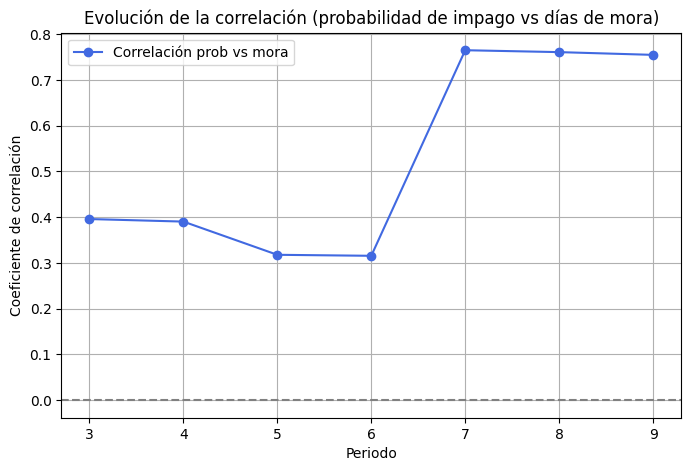

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(resultados['periodo'], resultados['corr_prob_vs_dias_mora'],
         marker='o', color='royalblue', label='Correlación prob vs mora')
plt.axhline(0, color='gray', linestyle='--')

plt.title('Evolución de la correlación (probabilidad de impago vs días de mora)')
plt.xlabel('Periodo')
plt.ylabel('Coeficiente de correlación')
plt.legend()
plt.grid(True)
plt.show()


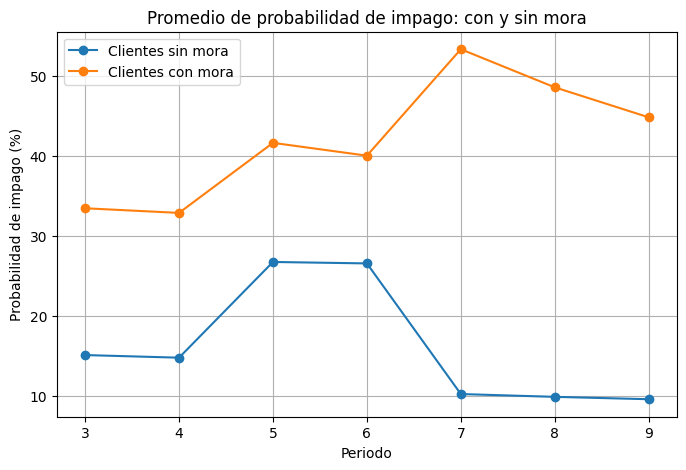

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(resultados['periodo'], resultados['promedio_prob_sin_mora'],
         marker='o', label='Clientes sin mora')
plt.plot(resultados['periodo'], resultados['promedio_prob_con_mora'],
         marker='o', label='Clientes con mora')
plt.title('Promedio de probabilidad de impago: con y sin mora')
plt.xlabel('Periodo')
plt.ylabel('Probabilidad de impago (%)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Definir rangos de probabilidad
bins = [0, 30, 60, 90, 100]
labels = ['0-30%', '30-60%', '60-90%', '>90%']

df_total['rango_prob_impago'] = pd.cut(
    df_total['probabilidad_impago_predecida_a_comienzo_de_mes'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Crear variable binaria: está o no en mora
df_total['esta_en_mora'] = df_total['dias_mora_al_final_de_mes_actual'] > 0

# Calcular métricas por rango
calibracion = df_total.groupby('rango_prob_impago').agg(
    promedio_prob_impago=('probabilidad_impago_predecida_a_comienzo_de_mes', 'mean'),
    proporcion_en_mora=('esta_en_mora', 'mean'),
    promedio_dias_mora=('dias_mora_al_final_de_mes_actual', 'mean'),
    promedio_valor_mora=('valor_mora_al_final_de_mes_actual', 'mean'),
    conteo=('probabilidad_impago_predecida_a_comienzo_de_mes', 'count')
).reset_index()

# Convertir proporciones a porcentaje
calibracion['proporcion_en_mora'] *= 100

print(calibracion)


  rango_prob_impago  promedio_prob_impago  proporcion_en_mora  \
0             0-30%              9.604118           12.504732   
1            30-60%             43.299741           40.389544   
2            60-90%             71.740240           62.478921   
3              >90%             96.238289             85.4314   

   promedio_dias_mora  promedio_valor_mora  conteo  
0            6.706141          8322.102219   26414  
1           40.648129          34763.97104    7804  
2           96.657673        200288.511804    2372  
3          233.179632        515969.468175     707  


/tmp/ipython-input-3977344475.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibracion = df_total.groupby('rango_prob_impago').agg(


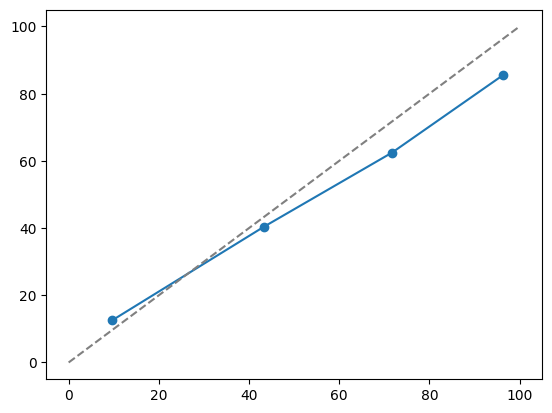

In [ ]:
plt.plot(calibracion['promedio_prob_impago'], calibracion['proporcion_en_mora'], marker='o')
plt.plot([0,100],[0,100],'--',color='gray')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

# Función para calcular KS
def calcular_ks(y_true, y_pred):
    data = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    data = data.sort_values('y_pred', ascending=False)
    data['cum_eventos'] = (data['y_true'] == 1).cumsum()
    data['cum_no_eventos'] = (data['y_true'] == 0).cumsum()
    data['tasa_eventos'] = data['cum_eventos'] / (data['y_true'] == 1).sum()
    data['tasa_no_eventos'] = data['cum_no_eventos'] / (data['y_true'] == 0).sum()
    ks = np.max(np.abs(data['tasa_eventos'] - data['tasa_no_eventos']))
    return ks

# Calcular Gini y KS por mes
resultados_gini_ks = []

for mes in sorted(df_total['periodo'].unique()):
    df_mes = df_total[df_total['periodo'] == mes]
    y_true = (df_mes['dias_mora_al_final_de_mes_actual'] > 0).astype(int)
    y_pred = df_mes['probabilidad_impago_predecida_a_comienzo_de_mes']

    auc = roc_auc_score(y_true, y_pred)
    gini = 2 * auc - 1
    ks = calcular_ks(y_true, y_pred)

    resultados_gini_ks.append({'periodo': mes, 'Gini': gini, 'KS': ks})

resultados_gini_ks = pd.DataFrame(resultados_gini_ks)
print(resultados_gini_ks)


  periodo      Gini        KS
0       3  0.515768  0.419192
1       4  0.515402  0.415351
2       5  0.380814  0.275443
3       6  0.350555  0.254294
4       7  0.808814  0.674329
5       8  0.775511  0.638766
6       9  0.746970  0.610625


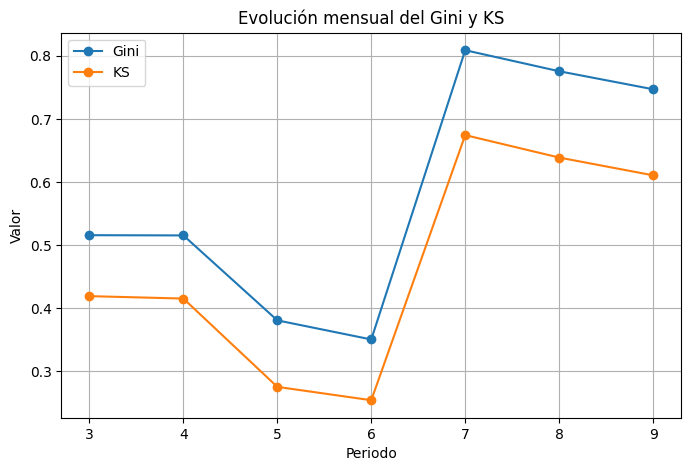

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(resultados_gini_ks['periodo'], resultados_gini_ks['Gini'], marker='o', label='Gini')
plt.plot(resultados_gini_ks['periodo'], resultados_gini_ks['KS'], marker='o', label='KS')
plt.title('Evolución mensual del Gini y KS')
plt.xlabel('Periodo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_total['delta_mora'] = df_total['dias_mora_al_final_de_mes_actual'] - df_total['dias_mora_al_final_de_mes_anterior']
def clasificar_delta(delta):
    if delta < 0:
        return 'Mejora'
    elif delta == 0:
        return 'Se mantiene'
    else:
        return 'Empeora'

df_total['transicion_mora'] = df_total['delta_mora'].apply(clasificar_delta)


In [ ]:
def evaluacion_modelo_ajustada(prob, delta):
    if prob >= 0.60 and delta > 0:
        return 'Acertó'
    elif prob < 0.30 and delta <= 0:
        return 'Acertó'
    elif 0.30 <= prob < 0.60 and delta <= 0:  # opcional, acierto conservador para riesgo medio
        return 'Acertó'
    else:
        return 'Falló'

df_total['modelo_acierto_transicion'] = df_total.apply(
    lambda x: evaluacion_modelo_ajustada(x['probabilidad_impago_predecida_a_comienzo_de_mes'], x['delta_mora']),
    axis=1
)


In [ ]:
# Asegúrate de tener las columnas 'cedula', 'periodo', 'transicion_mora' y 'modelo_acierto_transicion'

resumen_transicion = (
    df_total
    .groupby(['periodo', 'transicion_mora', 'cedula'])['modelo_acierto_transicion']
    .agg(lambda x: (x == 'Acertó').any())  # cuenta si ese cliente acertó al menos una vez
    .reset_index()
    .groupby(['periodo', 'transicion_mora'])
    .agg(
        clientes=('cedula', 'nunique'),
        aciertos_modelo=('modelo_acierto_transicion', 'sum')
    )
    .reset_index()
)

# proporción correcta entre 0 y 1
resumen_transicion['proporcion_acierto'] = (
    resumen_transicion['aciertos_modelo'] / resumen_transicion['clientes']
)


In [ ]:
resumen_transicion

,periodo,transicion_mora,clientes,aciertos_modelo,proporcion_acierto
0,3,Empeora,811,796,0.981504
1,3,Mejora,208,7,0.033654
2,3,Se mantiene,4188,351,0.083811
3,4,Empeora,765,751,0.981699
4,4,Mejora,199,12,0.060302
5,4,Se mantiene,3915,323,0.082503
6,5,Empeora,753,752,0.998672
7,5,Mejora,219,3,0.013699
8,5,Se mantiene,3637,123,0.033819
9,6,Empeora,883,877,0.993205


Riesgo agregado por periodo:
  periodo  mora_esperada_total  mora_real_total  ratio_pred_vs_real
0       3            119932.00           140259            0.855075
1       4            109485.00           130252            0.840563
2       5            164902.00           130895            1.259804
3       6            162291.00           130457            1.244019
4       7            101370.63           121365            0.835254
5       8             89963.24           116250            0.773877
6       9             81858.79           119006            0.687854


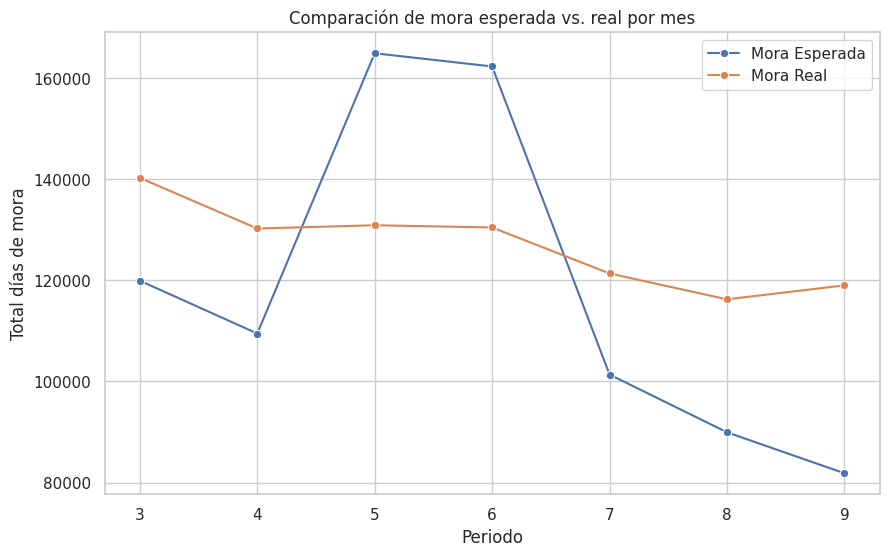

In [ ]:
# Calculamos riesgo esperado total por mes
riesgo_esperado = df_total.groupby('periodo')['probabilidad_impago_predecida_a_comienzo_de_mes'].sum().reset_index()
riesgo_esperado.rename(columns={'probabilidad_impago_predecida_a_comienzo_de_mes':'mora_esperada_total'}, inplace=True)

# Calculamos mora real total por mes
mora_real = df_total.groupby('periodo')['dias_mora_al_final_de_mes_actual'].sum().reset_index()
mora_real.rename(columns={'dias_mora_al_final_de_mes_actual':'mora_real_total'}, inplace=True)

# Unimos ambas
riesgo_portafolio = pd.merge(riesgo_esperado, mora_real, on='periodo')

# Calculamos ratio de predicción
riesgo_portafolio['ratio_pred_vs_real'] = riesgo_portafolio['mora_esperada_total'] / riesgo_portafolio['mora_real_total']

print("Riesgo agregado por periodo:")
print(riesgo_portafolio)

# Visualización
plt.figure(figsize=(10,6))
sns.lineplot(data=riesgo_portafolio, x='periodo', y='mora_esperada_total', marker='o', label='Mora Esperada')
sns.lineplot(data=riesgo_portafolio, x='periodo', y='mora_real_total', marker='o', label='Mora Real')
plt.title("Comparación de mora esperada vs. real por mes")
plt.ylabel("Total días de mora")
plt.xlabel("Periodo")
plt.legend()
plt.show()


Promedio utilidad simple: 0.0528
Promedio utilidad ajustada: 0.0415
Diferencia promedio: -0.0114


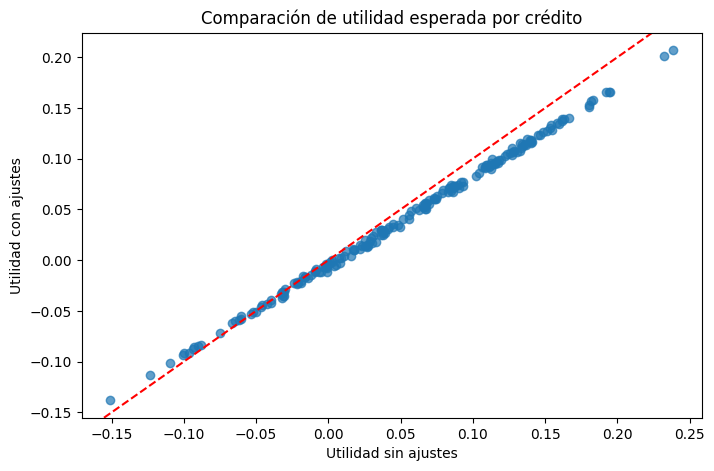

TypeError: utilidad_simple() got an unexpected keyword argument 'K'

In [ ]:
# Notebook demostrativo: Función de Utilidad con y sin ajustes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos ficticios
np.random.seed(42)
N = 200
K = np.random.uniform(0.5e6, 2e6, N)  # monto del préstamo
r = np.random.uniform(0.15, 0.35, N)   # tasa anual
c = np.random.uniform(0.05, 0.1, N)    # costo operativo
o = np.random.uniform(0.03, 0.05, N)   # costo financiero / descuento
PD = np.random.uniform(0.05, 0.3, N)   # probabilidad de impago
LGD = np.random.uniform(0.4, 0.7, N)   # pérdida dada la mora

# --- Función base sin ajustes ---
def utilidad_simple(PD, r, c, LGD):
    return (1 - PD) * (r - c) - PD * LGD

# --- Función ajustada ---
def utilidad_ajustada(PD, r, c, LGD, EAD_factor=0.85, delta=0.1, sigma_PD=0.02):
    PD_adj = PD + 0.5 * sigma_PD  # penalización por incertidumbre
    r_eff = r / (1 + delta)       # descuento temporal
    return (1 - PD_adj) * (r_eff - c) - PD_adj * LGD * EAD_factor

# Cálculos
df = pd.DataFrame({
    'K': K,
    'r': r,
    'c': c,
    'PD': PD,
    'LGD': LGD,
    'u_simple': utilidad_simple(PD, r, c, LGD),
    'u_ajustada': utilidad_ajustada(PD, r, c, LGD)
})

df['delta_u'] = df['u_ajustada'] - df['u_simple']

# Comparación general
print('Promedio utilidad simple:', round(df['u_simple'].mean(),4))
print('Promedio utilidad ajustada:', round(df['u_ajustada'].mean(),4))
print('Diferencia promedio:', round(df['delta_u'].mean(),4))

# Gráfica comparativa
plt.figure(figsize=(8,5))
plt.scatter(df['u_simple'], df['u_ajustada'], alpha=0.7)
plt.xlabel('Utilidad sin ajustes')
plt.ylabel('Utilidad con ajustes')
plt.title('Comparación de utilidad esperada por crédito')
plt.axline((0,0), slope=1, color='red', linestyle='--')
plt.show()

# Ejemplo numérico puntual
example = {
    'K': 1_000_000,
    'r': 0.28,
    'c': 0.08,
    'LGD': 0.6,
    'PD': 0.15
}

u_base = utilidad_simple(**example)
u_adj = utilidad_ajustada(**example)

print(f"Ejemplo: u_simple={u_base:.3f}, u_ajustada={u_adj:.3f}, cambio={(u_adj-u_base)/u_base:.1%}")


In [ ]:
example = {
    'r': 0.28,
    'c': 0.08,
    'LGD': 0.6,
    'PD': 0.15
}

u_base = utilidad_simple(**example)
u_adj = utilidad_ajustada(**example)
print(f"Ejemplo: u_simple={u_base:.3f}, u_ajustada={u_adj:.3f}, cambio={(u_adj-u_base)/u_base:.1%}")


Ejemplo: u_simple=0.080, u_ajustada=0.065, cambio=-18.7%


In [ ]:
# Notebook: Función de utilidad - versión simple vs versión ajustada
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Funciones principales ---
def annuity_payment(K, annual_rate, T_months):
    # calcula la cuota mensual nivelada
    i = annual_rate / 12.0
    if i == 0:
        return K / T_months
    return K * i / (1 - (1 + i) ** (-T_months))

def amortization_schedule(K, annual_rate, T_months):
    # retorna arrays de balance inicio periodo, intereses y principal pagado en cada mes
    payment = annuity_payment(K, annual_rate, T_months)
    balances, interests, principals = [], [], []
    balance = K
    i = annual_rate / 12.0
    for t in range(1, T_months + 1):
        interest = balance * i
        principal = payment - interest
        balances.append(balance)
        interests.append(interest)
        principals.append(principal)
        balance -= principal
    return {'balance': np.array(balances), 'interest': np.array(interests),
            'principal': np.array(principals), 'payment': payment}

def hazard_from_cumulative_PD(PD_cum, T_months):
    # convierte PD acumulada (vida del crédito) en hazard mensual h
    # 1 - (1-h)^T = PD_cum  -->  h = 1 - (1-PD_cum)^(1/T)
    return 1 - (1 - PD_cum) ** (1.0 / T_months)

# Función simple (fórmula en el documento, version rate * K para monetizar)
def utilidad_simple_monetaria(PD, r, c, LGD, K):
    # u_rate = (1 - PD)*(r - c) - PD*LGD  <-- fórmula en papel
    u_rate = (1 - PD) * (r - c) - PD * LGD
    return u_rate * K  # monetiza multiplicando por K

# Función ajustada (valor presente de flujos esperados, EAD, PD ajustado, costos operativos)
def utilidad_ajustada_vp(K, annual_r, c_ann, PD_cum, LGD, T_months,
                        delta_annual=0.10, op_fixed=40000, op_var_frac=0.02,
                        lambda_pd_unc=0.5, sigma_pd=0.02, EAD_factor=0.85):
    # correspondencias:
    # K -> monto
    # annual_r -> r (tasa anual)
    # c_ann -> c (costo anual proporcional), lo convertimos a monto anual c_ann*K para costos
    # PD_cum -> PD_i (probabilidad acumulada)
    # LGD -> LGD_i
    # delta_annual -> δ (tasa de descuento anual)
    # op_fixed, op_var_frac -> desagregado de costos operativos (monetarios)
    # lambda_pd_unc, sigma_pd -> ajuste por incertidumbre de PD (PD_adj = PD + lambda*sigma)
    # EAD_factor -> ajuste de EAD (EAD promedio relativa a K)

    # convertir tasa de descuento anual a mensual (aprox equivalente)
    delta_m = (1 + delta_annual) ** (1/12) - 1

    # generar calendario de amortización y flujos
    sched = amortization_schedule(K, annual_r, T_months)
    balances = sched['balance']
    interests = sched['interest']

    # hazard mensual a partir de PD acumulada
    h = hazard_from_cumulative_PD(PD_cum, T_months)

    # ajustar PD por incertidumbre (prima de model risk)
    PD_adj = min(1.0, PD_cum + lambda_pd_unc * sigma_pd)
    h_adj = hazard_from_cumulative_PD(PD_adj, T_months)

    # EAD por periodo (aproximación: balance inicio periodo * EAD_factor)
    EAD_t = balances * EAD_factor

    # costos operativos monetarios por mes
    op_fixed_monthly = op_fixed / T_months
    op_var_monthly = op_var_frac * K / T_months
    op_t = op_fixed_monthly + op_var_monthly

    # calcular VP de flujos esperados:
    vp = 0.0
    survival = 1.0
    for t in range(1, T_months + 1):
        # ingreso por intereses si no ha habido default: survival * interest_t
        cf_interest = survival * interests[t-1]

        # probabilidad de default en ese periodo (condicional)
        prob_default_at_t = survival * h_adj

        # pérdida esperada ese periodo = prob_default_at_t * (EAD_t * LGD)
        loss_default = prob_default_at_t * (EAD_t[t-1] * LGD)

        # flujo neto periodo = interés esperado - pérdida esperada - costos
        net_t = cf_interest - loss_default - op_t

        # descontar
        pv_t = net_t / ((1 + delta_m) ** t)
        vp += pv_t

        # actualizar supervivencia
        survival *= (1 - h_adj)

    return vp

# ---------------------------
# EJEMPLO FIJO (para mostrar resultados)
# ---------------------------
K = 1000000
r = 0.28
c = 0.08
LGD = 0.6
PD = 0.15
T = 12

u_simple = utilidad_simple_monetaria(PD, r, c, LGD, K)
u_adj = utilidad_ajustada_vp(K, r, c, PD, LGD, T, delta_annual=0.10,
                            op_fixed=40000, op_var_frac=0.02,
                            lambda_pd_unc=0.5, sigma_pd=0.02, EAD_factor=0.85)

print('Utilidad simple (COP):', round(u_simple,0))
print('Utilidad ajustada VP (COP):', round(u_adj,0))
print('Cambio relativo (%):', round((u_adj - u_simple) / u_simple * 100, 1), '%')


Utilidad simple (COP): 80000.0
Utilidad ajustada VP (COP): 41884.0
Cambio relativo (%): -47.6 %
